In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [55]:
happy = pd.read_csv("data/Happiness.csv")
nutrition = pd.read_csv("data/nutrition_data.csv")[:96131]  # 2019 only to match timescale of happiness data

nutrition_final = nutrition.copy()

nutrition_final.loc[nutrition["Country Name"] == "Russian Federation", "Country Name"] = "Russia"
nutrition_final.loc[nutrition["Country Name"] == "Czechia", "Country Name"] = "Czech Republic"
nutrition_final.loc[nutrition["Country Name"] == "Trinidad and Tobago", "Country Name"] = "Trinidad & Tobago"
nutrition_final.loc[nutrition["Country Name"] == "Hong Kong SAR, China", "Country Name"] = "Hong Kong"
nutrition_final.loc[nutrition["Country Name"] == "Cote d'Ivoire", "Country Name"] = "Ivory Coast"
nutrition_final.loc[nutrition["Country Name"] == "Congo, Rep.", "Country Name"] = "Congo (Brazzaville)"
nutrition_final.loc[nutrition["Country Name"] == "Congo, Dem. Rep.", "Country Name"] = "Congo (Kinshasa)"
nutrition_final.loc[nutrition["Country Name"] == "Lao PDR", "Country Name"] = "Laos"
nutrition_final.loc[nutrition["Country Name"] == "Iran, Islamic Rep.", "Country Name"] = "Iran"
nutrition_final.loc[nutrition["Country Name"] == "Kyrgyz Republic", "Country Name"] = "Kyrgyzstan"
nutrition_final.loc[nutrition["Country Name"] == "Slovak Republic", "Country Name"] = "Slovakia"
nutrition_final.loc[nutrition["Country Name"] == "Turkiye", "Country Name"] = "Turkey"
nutrition_final.loc[nutrition["Country Name"] == "Venezuela, RB", "Country Name"] = "Venezuela"
nutrition_final.loc[nutrition["Country Name"] == "Egypt, Arab Rep.", "Country Name"] = "Egypt"
nutrition_final.loc[nutrition["Country Name"] == "Syrian Arab Republic", "Country Name"] = "Syria"
nutrition_final.loc[nutrition["Country Name"] == "Yemen, Rep.", "Country Name"] = "Yemen"
nutrition_final.loc[nutrition["Country Name"] == "West Bank and Gaza", "Country Name"] = "Palestinian Territories"
nutrition_final.loc[nutrition["Country Name"] == "Korea, Rep.", "Country Name"] = "South Korea"
nutrition_final.loc[nutrition["Country Name"] == "Gambia, The", "Country Name"] = "Gambia"
nutrition_final.loc[nutrition["Country Name"] == "Eswatini", "Country Name"] = "Swaziland"

In [56]:
nutrition_wide = nutrition_final.pivot(index = "Country Name", 
                                 columns = "Series Name", 
                                 values = "2019 [YR2019]")

In [57]:
happy_merged = pd.merge(happy, nutrition_wide, how = "inner", 
                        right_on = "Country Name", 
                        left_on = "Country or region") # excluded Taiwan and Northern Cyprus

In [58]:
happy_merged.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,AIDS estimated deaths (UNAIDS estimates),...,Urban population (% of total population),Urban population growth (annual %),Urban poverty headcount ratio at national poverty lines (% of urban population),Use of insecticide-treated bed nets (% of under-5 population),Vitamin A supplementation coverage rate (% of children ages 6-59 months),Wanted fertility rate (births per woman),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,..,...,85.446,0.185101615266816,..,..,..,..,..,..,26.6,..
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,100,...,87.994,0.494581334948344,..,..,..,..,..,..,25.9,100
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,100,...,82.616,1.12148861779611,..,..,..,..,..,..,31.6,100
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,100,...,93.855,2.24361872841293,..,..,..,..,..,..,30.5,100
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,100,...,91.876,1.0760840670841,..,..,..,..,..,..,18.5,100


In [88]:
# Select columns we want
happy = happy_merged[["Country or region",
                      "Score",
                      "Current health expenditure per capita, PPP (current international $)",
                      "Prevalence of undernourishment (% of population)",
                      "Net migration",
                      "Prevalence of HIV, total (% of population ages 15-49)"]]
happy = happy.replace('..', np.nan)

# Convert objects to floats
happy["Prevalence of Undernourishment"] = pd.to_numeric(happy["Prevalence of undernourishment (% of population)"])
happy["Prevalence of HIV"] = pd.to_numeric(happy["Prevalence of HIV, total (% of population ages 15-49)"])
happy["Net Migration"] = pd.to_numeric(happy["Net migration"])
happy["Health Expenditure Per Capita"] = pd.to_numeric(happy["Current health expenditure per capita, PPP (current international $)"])

# Drop old columns
happy_with_country = happy[["Country or region", "Prevalence of HIV"]]

happy = happy.drop(["Country or region",
                    "Current health expenditure per capita, PPP (current international $)",
                    "Prevalence of undernourishment (% of population)",
                    "Net migration",
                    "Prevalence of HIV, total (% of population ages 15-49)"], axis=1)
happy.dtypes

Score                             float64
Prevalence of Undernourishment    float64
Prevalence of HIV                 float64
Net Migration                       int64
Health Expenditure Per Capita     float64
dtype: object

In [60]:
happy.head(20)

,Score,Prevalence of Undernourishment,Prevalence of HIV,Net Migration,Health Expenditure Per Capita
0,7.769,2.5,NaN,15558,4710.218262
1,7.600,2.5,0.1,23305,6015.460938
2,7.554,2.5,0.1,25564,7217.386719
3,7.494,2.5,0.1,5152,5636.412598
4,7.488,2.5,0.2,60266,6248.151855
5,7.480,2.5,0.2,43546,8532.496094
6,7.343,2.5,NaN,81585,6222.659180
7,7.307,2.5,0.1,103392,4439.349609
8,7.278,2.5,NaN,391914,5520.651367
9,7.246,2.5,NaN,41105,6134.131348


<AxesSubplot: xlabel='Prevalence of Undernourishment', ylabel='Count'>

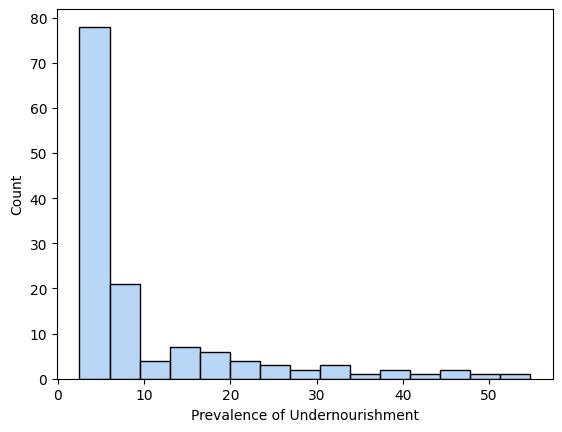

In [61]:
sns.histplot(data = happy, x = "Prevalence of Undernourishment")

[Text(0.5, 1.0, 'Histogram of Score')]

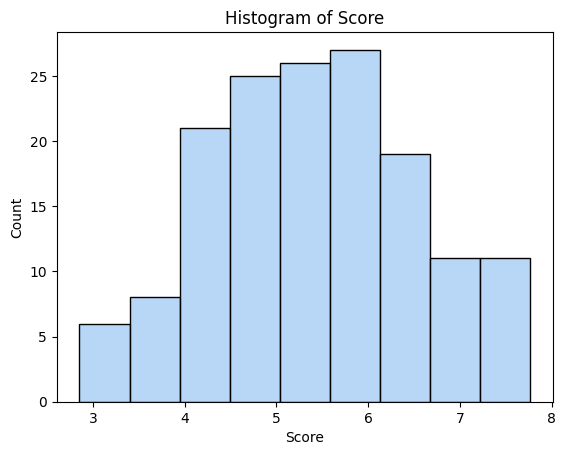

In [62]:
sns.histplot(data = happy, x = "Score").set(title = "Histogram of Score")

<AxesSubplot: xlabel='Prevalence of HIV', ylabel='Count'>

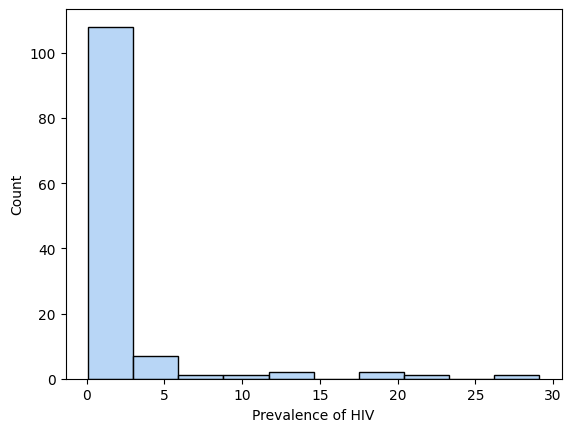

In [63]:
sns.histplot(data = happy, x = "Prevalence of HIV", bins = 10)

<AxesSubplot: xlabel='Health Expenditure Per Capita', ylabel='Count'>

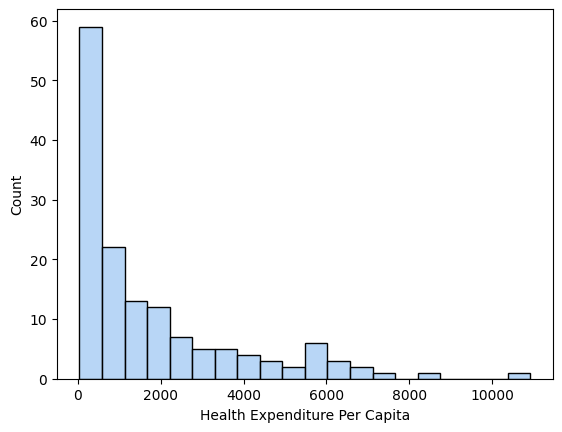

In [64]:
sns.histplot(data = happy, x = "Health Expenditure Per Capita", bins = 20)

<AxesSubplot: xlabel='Net Migration', ylabel='Count'>

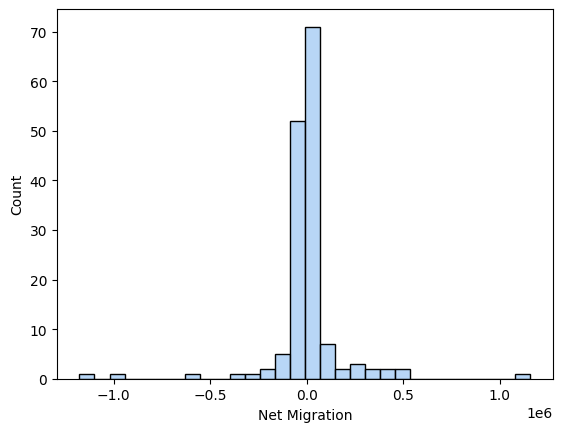

In [65]:
sns.histplot(data = happy, x = "Net Migration", bins = 30)

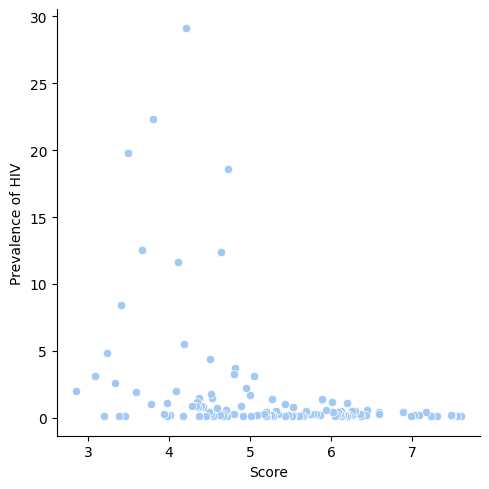

In [66]:
sns.relplot(x = "Score", y = "Prevalence of HIV", data = happy)

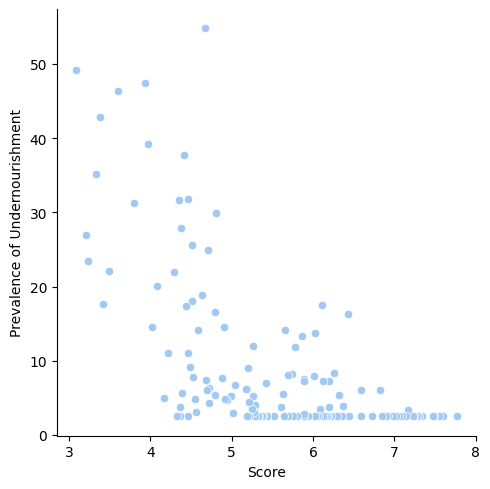

In [67]:
sns.relplot(x = "Score", y = "Prevalence of Undernourishment", data = happy)

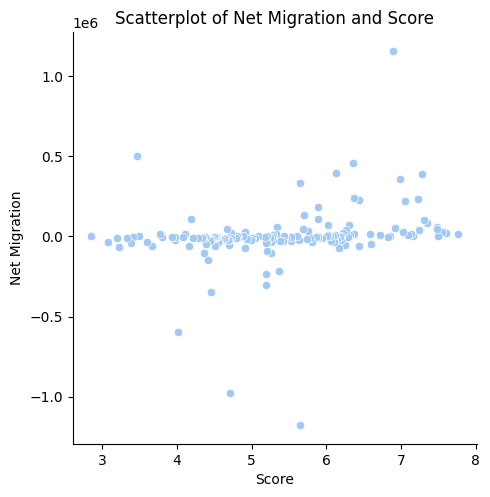

In [68]:
sns.relplot(x = "Score", y = "Net Migration", data = happy).set(title = "Scatterplot of Net Migration and Score")  # Initially does not look like there is much of a relationship

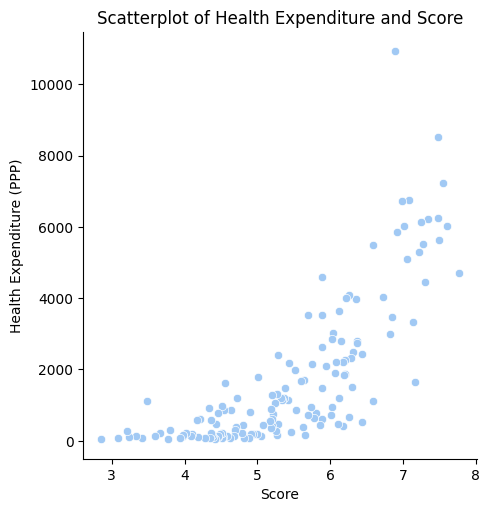

In [69]:
sns.relplot(x = "Score", y = "Health Expenditure Per Capita", data = happy).set(title = "Scatterplot of Health Expenditure and Score", ylabel = "Health Expenditure (PPP)")

In [70]:
"""
We will attempt to data mine information from the variables.

Thus, we will not be train/test splitting nor standardizing data or using 
regularization methods, for now.
"""
X = happy[["Health Expenditure Per Capita",
          "Prevalence of Undernourishment",
          "Net Migration",
          "Prevalence of HIV"]] 
y = happy[["Score"]]

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# X_imputed = X.fillna(X.mean())
X_imputed = X.interpolate().fillna(method="bfill")
X_imputed["Health Expenditure Squared"] = X_imputed["Health Expenditure Per Capita"] ** 2

lm = LinearRegression()
lm.fit(X_imputed, y)
predicted_ols = lm.predict(X_imputed)

r2_score(y, predicted_ols)

0.7655013522467002

Can't get pvalues from sklearn, so I will do it manually with linear algebra.

In [72]:
X_design = pd.DataFrame({"Intercept":np.ones(len(X_imputed))}).join(pd.DataFrame(X_imputed))
params = np.append(lm.intercept_,lm.coef_)
mse = (1/y.shape[0]) * (predicted_ols - y.values).T @ (predicted_ols - y.values)

var_beta = mse * (np.linalg.inv(X_design.T @ X_design).diagonal())
se_beta = np.sqrt(var_beta).flatten()
t_stats = params/ se_beta

p_vals = []

for t in t_stats:
    # phi(-x) + 1 - phi(x) = 2 * (1 - phi(abs(x)))
    p = 2 * (1 - stats.t.cdf(x=np.abs(t),df=X_design.shape[0] - X_design.shape[1])) 
    p_vals.append(p)

intervals = []
for i, coef in enumerate(params):
    low = '{:0.3e}'.format(coef - 2*se_beta[i])
    high = '{:0.3e}'.format(coef + 2*se_beta[i])
    interval = (low, high)
    intervals.append(interval)

# The transposes are to make them columns so we can append them
t_test_results = pd.DataFrame()
t_test_results["Feature"] = X_design.columns
t_test_results["Est. Coefficient"] = params
t_test_results["Standard Error"] = se_beta
t_test_results["t-stat"] = t_stats.T
t_test_results["p-val"] = np.array(p_vals).T
t_test_results["95% CI"] = intervals

print("r^2 Value: " + str(r2_score(y, predicted_ols).round(3)) 
      + "\tMSE: " + str(mse[0][0].round(3)) 
      + "\tT-Dist DF: " + str(X_design.shape[0] - X_design.shape[1]))
t_test_results

r^2 Value: 0.766	MSE: 0.291	T-Dist DF: 148


,Feature,Est. Coefficient,Standard Error,t-stat,p-val,95% CI
0,Intercept,4.970359e+00,1.045149e-01,47.556447,0.000000e+00,"(4.761e+00, 5.179e+00)"
1,Health Expenditure Per Capita,5.860842e-04,6.517152e-05,8.992949,1.110223e-15,"(4.557e-04, 7.164e-04)"
2,Prevalence of Undernourishment,-2.631013e-02,4.366737e-03,-6.025123,1.282028e-08,"(-3.504e-02, -1.758e-02)"
3,Net Migration,-3.032028e-07,2.540914e-07,-1.193283,2.346681e-01,"(-8.114e-07, 2.050e-07)"
4,Prevalence of HIV,-4.182538e-02,1.130437e-02,-3.699931,3.034360e-04,"(-6.443e-02, -1.922e-02)"
5,Health Expenditure Squared,-3.362255e-08,8.285234e-09,-4.058129,7.981254e-05,"(-5.019e-08, -1.705e-08)"


### Model Diagnostics

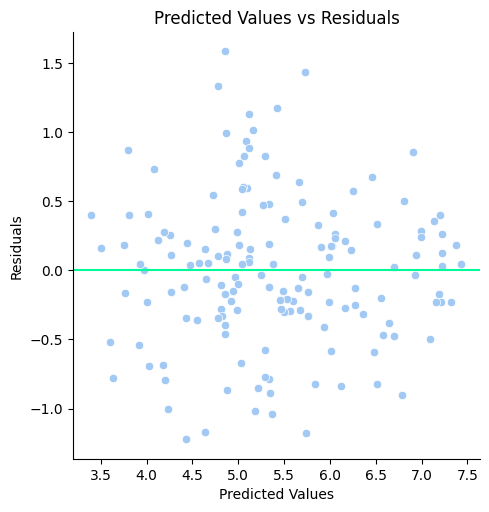

In [73]:
import matplotlib.pyplot as plt

res_pred = pd.DataFrame()
res_pred["Residuals"] = y - predicted_ols
res_pred["Predicted"] = predicted_ols

# Residuals vs Fitted
sns.set_palette("pastel")
g = sns.relplot(y="Residuals", x="Predicted", data=res_pred)
g.ax.axhline(y=0, color='mediumspringgreen')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Predicted Values vs Residuals")
plt.show()

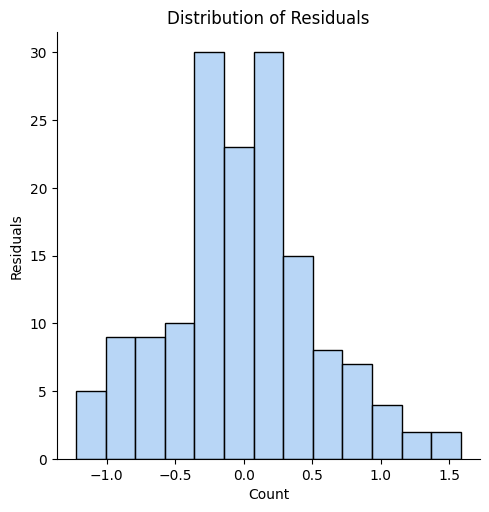

In [74]:
# Residual Distribution
sns.displot(x="Residuals", data=res_pred)
plt.xlabel("Count")
plt.ylabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

lm2 = LinearRegression()
lm2.fit(X_scaled, y)
predicted_ols2 = lm2.predict(X_scaled)
r2_score(y, predicted_ols2)


0.7655013522467004

Scaling does not make much of a difference in this case and impacts model interpretability. Don't include this in the final report.

## Assessing Downfalls
There are issues with multicollinearity and the data not being missing at random

In [92]:
only_na_hiv = happy_with_country[happy_with_country["Prevalence of HIV"].isna()]
only_na_hiv.head()

,Country or region,Prevalence of HIV
0,Finland,NaN
6,Sweden,NaN
8,Canada,NaN
9,Austria,NaN
12,Israel,NaN


In [93]:
only_na_hiv.tail()

,Country or region,Prevalence of HIV
98,Jordan,NaN
107,Palestinian Territories,NaN
113,Armenia,NaN
120,Mozambique,NaN
123,Iraq,NaN


In [43]:
no_int = X_design.drop(["Intercept"], axis=1)
cond_undernourishment = np.linalg.cond(no_int.values)
no_under = no_int.drop(["Prevalence of Undernourishment", "Prevalence of HIV"], axis=1)
cond_no_under = np.linalg.cond(no_under.values)

print("Condition Number with Undernourishment and HIV: " + str(cond_undernourishment.round(2)))
print("Condition Number without Undernourishment nor HIV: " + str(cond_no_under.round(2)))
print("Ratio: " + str((cond_undernourishment / cond_no_under).round(2)))

Condition Number with Undernourishment and HIV: 4325205.24
Condition Number without Undernourishment nor HIV: 15656.24
Ratio: 276.26


In [209]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_imputed, y)
predicted_lasso = lasso.predict(X_imputed)

r2_score(y, predicted_lasso)

0.6053374961355049

When imputing missing data, we see LASSO keeps only two parameters (Prevalence of Undernourishment and Health Expenditure Squared). When we use the mean, it keeps 4 coefficients (all but HIV prevalence).

In [210]:
print(X_imputed.columns)
print(lm.coef_)
print(lasso.coef_)

Index(['Health Expenditure Per Capita', 'Prevalence of Undernourishment',
       'Net Migration', 'Prevalence of HIV', 'Health Expenditure Squared'],
      dtype='object')
[[ 0.5860842  -0.02631013 -0.00303203 -0.04182538 -0.03362255]]
[ 0.         -0.04219652 -0.         -0.          0.03042231]


One of the first big challenges we run into is missing data. Given the extremely limited amount of observations we have (155), it would be foolish to drop rows with missing entries. Instead, we can use a variation of monte carlo simulation from module 3. Specifically, we will use Markov Chain Monte Carlo (MCMC) to impute missing entries from a multivariate normal distribution. This will undoubtedly give us the most accurate values for missing data and perform better than mean replacement/row dropping.